# PyTorch Custom Datasets

In [1]:
import torch
import torch.nn as nn
from pathlib import Path

print(torch.__version__)

2.0.0+cu117


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

GeT Data - Food vision Mini


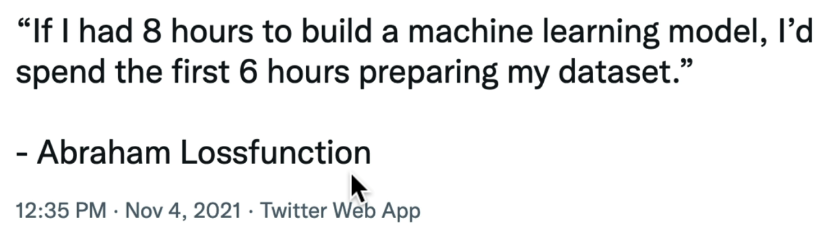

Data Prep and explorartion

In [3]:
# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

In [4]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
image_path

PosixPath('data/pizza_steak_sushi')

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


Training and test paths

In [7]:
train_dir = image_path/ 'train'
test_dir = image_path / 'test'

print(train_dir, test_dir)
train_dir

data/pizza_steak_sushi/train data/pizza_steak_sushi/test


PosixPath('data/pizza_steak_sushi/train')

Visualize the image


Let's write some code to:

Get all of the image paths using pathlib.Path.glob() to find all of the files ending in .jpg.
Pick a random image path using Python's random.choice().
Get the image class name using pathlib.Path.parent.stem.
And since we're working with images, we'll open the random image path using PIL.Image.open() (PIL stands for Python Image Library).
We'll then show the image and print some metadata.

In [8]:
import random
from PIL import Image

random.seed(42)

In [9]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
#glob all images in test/train
len(image_path_list)

300

In [10]:
random_img_path = random.choice(image_path_list)
print(random_img_path)

data/pizza_steak_sushi/test/steak/1016217.jpg


In [11]:
# Image class is name of directory
image_class = random_img_path.parent.stem
image_class

'steak'

512 512


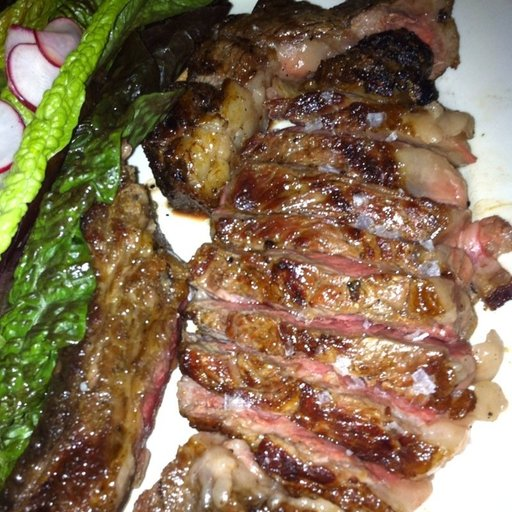

In [12]:
img = Image.open(random_img_path)
print(img.height, img.width)
img

(512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

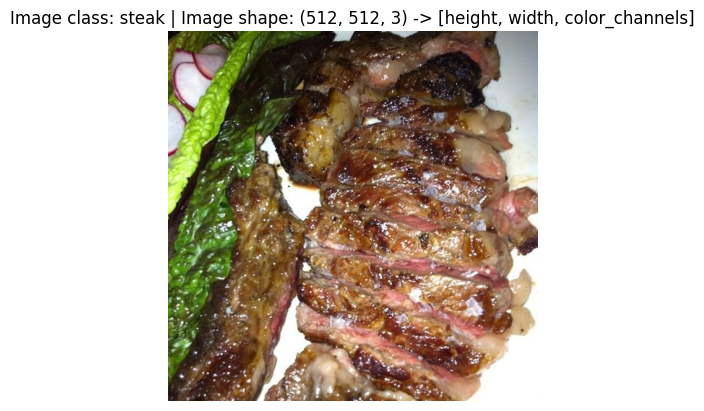

In [13]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
print(img_as_array.shape)
plt.imshow(img_as_array)

plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

Transforming data

In [62]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transforming data with torchvision.transform
data_transform = transforms.Compose([

    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() # H W C -> C H W 
    ]
)

In [15]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [16]:
data_transform(img)

tensor([[[0.4980, 0.5098, 0.5216,  ..., 0.3333, 0.1608, 0.0706],
         [0.5098, 0.5216, 0.5333,  ..., 0.3686, 0.3333, 0.2235],
         [0.5255, 0.5373, 0.5490,  ..., 0.3294, 0.3843, 0.3922],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.3216, 0.2353, 0.1882],
         [0.9961, 0.9961, 1.0000,  ..., 0.3529, 0.2118, 0.1451],
         [0.9961, 0.9961, 1.0000,  ..., 0.3216, 0.2196, 0.1804]],

        [[0.5176, 0.5373, 0.5451,  ..., 0.3529, 0.1725, 0.0549],
         [0.5412, 0.5529, 0.5608,  ..., 0.3765, 0.3373, 0.2118],
         [0.5608, 0.5725, 0.5882,  ..., 0.3020, 0.3569, 0.3686],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.2510, 0.1725, 0.1569],
         [1.0000, 1.0000, 1.0000,  ..., 0.2784, 0.1608, 0.1098],
         [1.0000, 1.0000, 1.0000,  ..., 0.2392, 0.1529, 0.1373]],

        [[0.5412, 0.5529, 0.5608,  ..., 0.0980, 0.0471, 0.0235],
         [0.5686, 0.5725, 0.5804,  ..., 0.0941, 0.0667, 0.0471],
         [0.5961, 0.6039, 0.6000,  ..., 0.0824, 0.0980, 0.

In [93]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

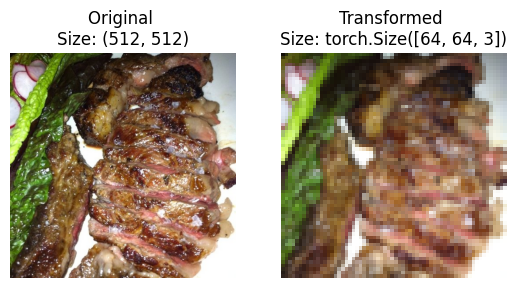

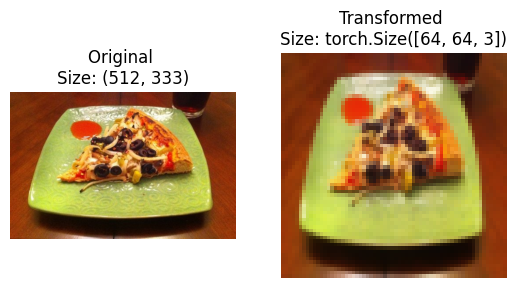

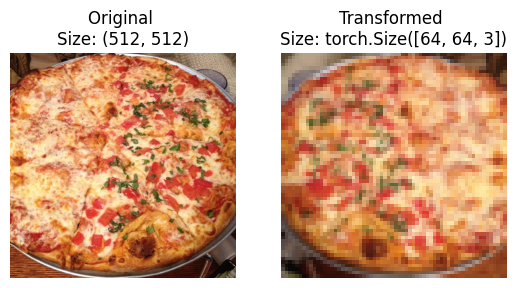

In [18]:
plot_transformed_images(image_path_list, transforms, n=3, seed=42)

Loading all data + Visualize

#### 3. Loading image dataset using Image Folder

In [19]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                  transform=data_transform,
                                  target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
train_data.classes

['pizza', 'steak', 'sushi']

In [21]:
class_dict = {}

for idx, cls in enumerate(train_data.classes):
    class_dict[cls] = idx


In [22]:
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [23]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [24]:
len(train_data), len(test_data)

(225, 75)

In [25]:
train_data.samples[1]

('data/pizza_steak_sushi/train/pizza/1033251.jpg', 0)

In [26]:
img, label = train_data[0][0], train_data[0][1]

# print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image shape: torch.Size([3, 64, 64])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


In [27]:
img_permute = img.permute(1,2,0)
print(img_permute.shape)

torch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

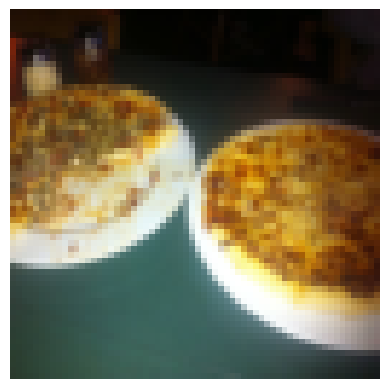

In [28]:
plt.imshow(img_permute)
plt.axis("off")

#### 3.2 Turn loaded images into DataLoader's

In [29]:
from torch.utils.data import DataLoader
BATCH_SIZE = 4
NUM_WORKER = 1

# turn datasets into iterables. (batches)

train_dataloader = DataLoader(train_data, BATCH_SIZE, num_workers=NUM_WORKER, shuffle=True)
test_dataloader = DataLoader(test_data, BATCH_SIZE, num_workers=NUM_WORKER, shuffle=False)

In [30]:
train_dataloader.batch_size

4

In [31]:
os.cpu_count()

16

In [32]:
len(train_dataloader), len(test_dataloader)

(57, 19)

In [33]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([4, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([4])


## Create a custom Dataset to replicate ImageFolder


In [34]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [35]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
from PIL import Image
import os
import pathlib

Creating a helper function to get class names
Let's write a helper function capable of creating a list of class names and a dictionary of class names and their indexes given a directory path.

To do so, we'll:

Get the class names using os.scandir() to traverse a target directory (ideally the directory is in standard image classification format).
Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
Turn the class names into a dictionary of numerical labels, one for each class.

In [36]:
list(os.scandir(image_path / "train"))

[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]

In [37]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


In [38]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [39]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

Pytorch custom datset class to load our images/ Replictae ImageFolder

In [71]:
"""  
target_dir = to get the data from
paths = paths of our images
transform - transform the way you like
classes 0 list of traget classes
class_to_idx = a dict of the target classes mapped to int labels

method - 
1. load_images - read and open image at ith index
2. __len__ method - length of dataset
3. __getitem()__ - return given sample when passed index
"""

class ImageFolderCustom(Dataset):

    def __init__(self, target_dir:str,
                 transform = None) -> None:
        super().__init__()

        # Get all image paths
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))

        # set up transform
        self.tranform = transform

        # create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(target_dir)
        # one is list and nother one is map

    
    def load_images(self, index:int)-> Image.Image:

        img_path = self.paths[index]
        img = Image.open(img_path)
        return img
        

    def __len__(self)->int:
        return len(self.paths)

    "Returns one sample of data, data and label (X, y)."
    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        img = self.load_images(index)
        class_name = self.paths[index].parent.name # class name
        class_idx = self.class_to_idx[class_name]

        if self.tranform:
            return self.tranform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)


In [45]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [72]:
img_custom = ImageFolderCustom(target_dir=train_dir,
                               transform=data_transform)


In [60]:
img_custom.__len__()

225

In [73]:
# Transforming data with torchvision.transform
data_transform = transforms.Compose([

    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() # H W C -> C H W 
    ]
)

In [75]:
img, class_idx = img_custom.__getitem__(0)
print(img.shape, class_idx)

torch.Size([3, 64, 64]) 0


In [76]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [81]:
train_data_custom = ImageFolderCustom(target_dir=train_dir,
                               transform=train_transforms)

test_data_custom = ImageFolderCustom(target_dir=test_dir,
                               transform=train_transforms)

len(train_data_custom), len(test_data_custom)

(225, 75)

In [83]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [84]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [85]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f763600afa0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f763600ad00>)

In [86]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [87]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

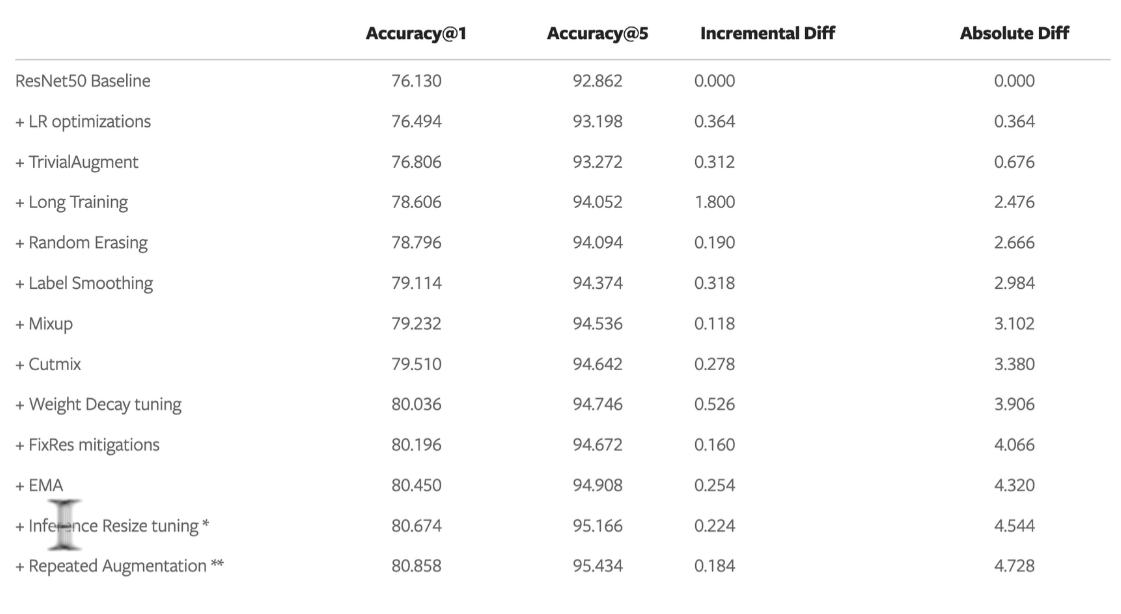

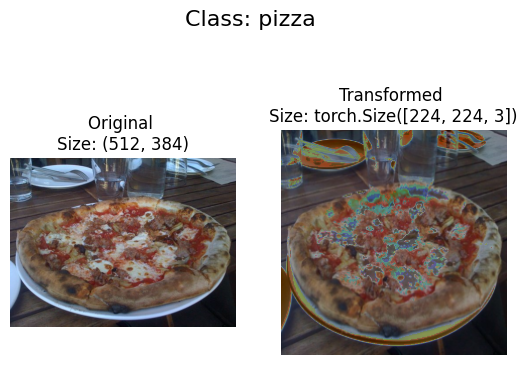

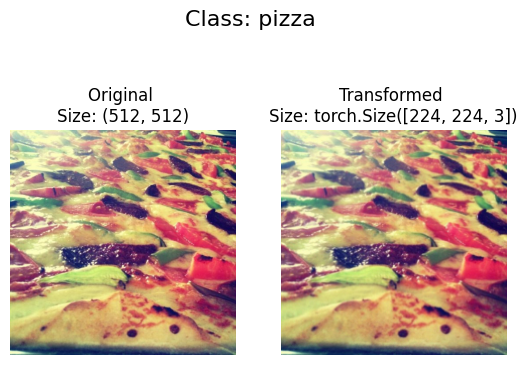

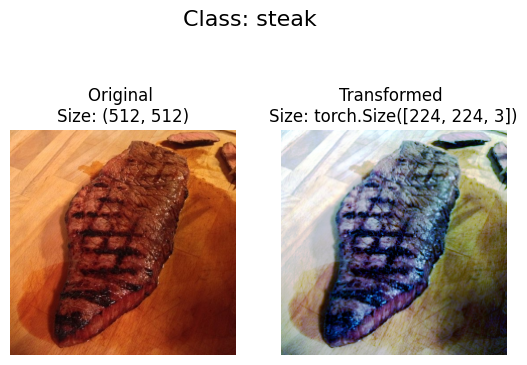

In [95]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

## Model 0 TinyVGG w/o data augmentation

In [96]:
simple_transform = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
          # input to Tiny VGG
        transforms.ToTensor()
    ]
)

In [108]:
train_data.classes

AttributeError: 'DataLoader' object has no attribute 'classes'

In [109]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                  transform=data_transform,
                                  target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [110]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data, 
                                     batch_size=BATCH_SIZE, 
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_simple = DataLoader(test_data, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7f75e44fef70>,
 <torch.utils.data.dataloader.DataLoader at 0x7f75e44fe040>)

In [111]:
train_data.classes

['pizza', 'steak', 'sushi']

Create Tiny VGG Architecture

In [188]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, 
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [193]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels in our image data
                  hidden_units=10, 
                  output_shape=3).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [194]:
img1 = torch.rand(1,3,64,64)
model_0(img1.to(device))

tensor([[0.0219, 0.0011, 0.0110]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [195]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [196]:
model_0(image_batch.to(device)).shape

torch.Size([32, 3])

In [129]:
!pip install torchinfo

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


In [133]:
from torchinfo import summary

In [134]:
summary(model_0, input_size=[1,3, 64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [197]:
device

'cuda'

In [202]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  
  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader) 
  return train_loss, train_acc

In [207]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader): 
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [204]:
from tqdm.auto import tqdm

COMBINE = Trainstep + test Step in a function to train and evalute the model

In [208]:
import torch.utils
import torch.utils.data

# Create Train Function to Train and Evaluate our Models = Combines train_step() +  test_step()

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer, 
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(), # defalult multi-class classifications
          epochs:int = 5,
          device=device):
    
    # 2. Make dict of results - empty

    results = {
        "train_loss": [],
        "test_loss" : [],
        "train_acc": [],
        "test_acc":  []
    }
    # 3. Loop through training + testing steps for a number of epochs

    for epoch in tqdm(range(epochs)):

        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)

        test_loss, test_acc = test_step(model, train_dataloader, loss_fn, device)

        # 4. update res dictionary
        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)
        results["train_acc"].append(train_acc)
        results["test_acc"].append(test_acc)

        # 5. whats happening ? 
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

    return results

In [210]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10

# recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# setup Loss function + optimizer
optimizer = torch.optim.Adam(model_0.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

#start the timer

from timeit import default_timer as timer
start_time = timer()

# Train model_0 without data augmentation

model_0_results = train(model_0, train_dataloader_simple, test_dataloader_simple, optimizer, loss_fn, NUM_EPOCHS, device)

# end timre

end_time = timer()

total_training_time = end_time - start_time
print(f"Total Training time = {total_training_time:.3f} seconds")


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3086 | test_loss: 1.0958 | test_acc: 0.5820
Epoch: 2 | train_loss: 1.0834 | train_acc: 0.4414 | test_loss: 1.0797 | test_acc: 0.4023
Epoch: 3 | train_loss: 1.1062 | train_acc: 0.2812 | test_loss: 1.0674 | test_acc: 0.4062
Epoch: 4 | train_loss: 1.0754 | train_acc: 0.4805 | test_loss: 1.0551 | test_acc: 0.5195
Epoch: 5 | train_loss: 1.0647 | train_acc: 0.3984 | test_loss: 1.0410 | test_acc: 0.3945
Epoch: 6 | train_loss: 1.0036 | train_acc: 0.5703 | test_loss: 1.0082 | test_acc: 0.4570
Epoch: 7 | train_loss: 0.9039 | train_acc: 0.5742 | test_loss: 0.8631 | test_acc: 0.5625
Epoch: 8 | train_loss: 0.9609 | train_acc: 0.4609 | test_loss: 0.9287 | test_acc: 0.4766
Epoch: 9 | train_loss: 0.9046 | train_acc: 0.5000 | test_loss: 0.9283 | test_acc: 0.5195
Epoch: 10 | train_loss: 0.8201 | train_acc: 0.6172 | test_loss: 0.8232 | test_acc: 0.6211
Total Training time = 12.372 seconds


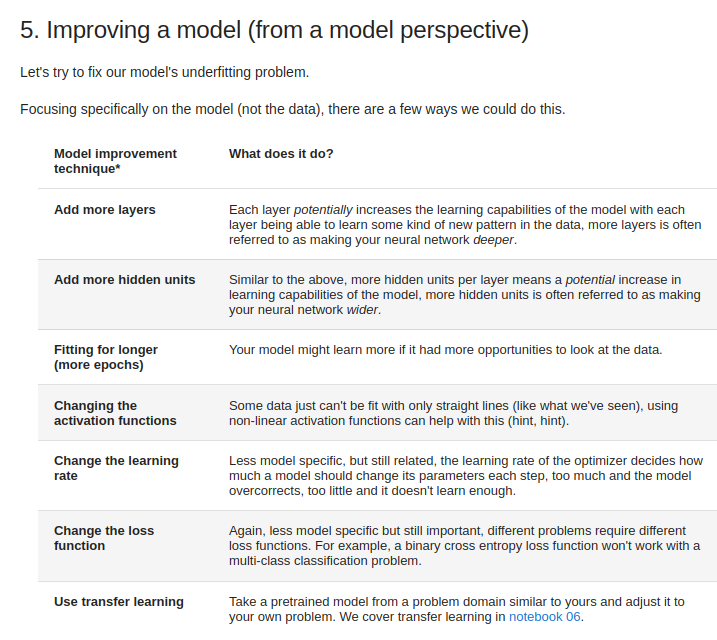

In [213]:
list(model_0_results.keys())

['train_loss', 'test_loss', 'train_acc', 'test_acc']

In [215]:
model_0_results["train_acc"]

[0.30859375,
 0.44140625,
 0.28125,
 0.48046875,
 0.3984375,
 0.5703125,
 0.57421875,
 0.4609375,
 0.5,
 0.6171875]

In [217]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

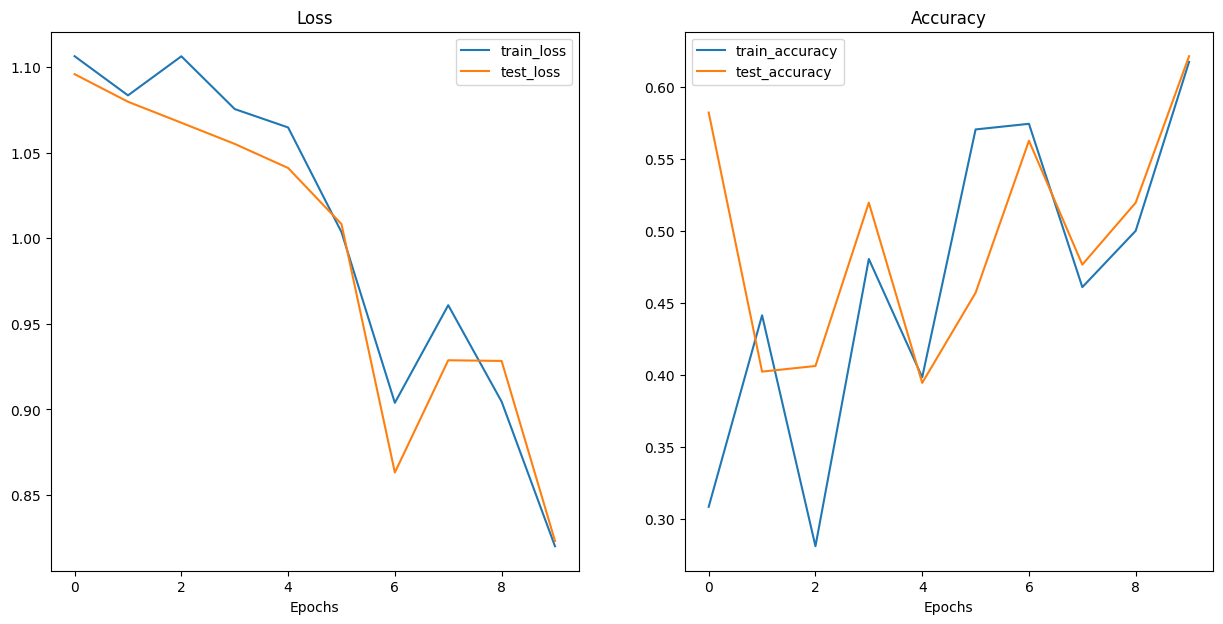

In [218]:
plot_loss_curves(model_0_results)

#### Balance between Overfitting + Underfitting, How to deal with each ?

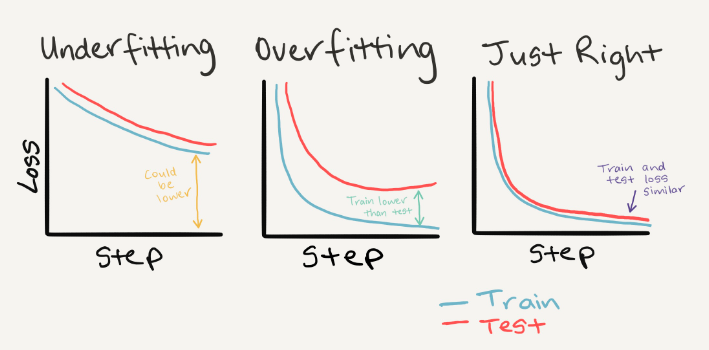

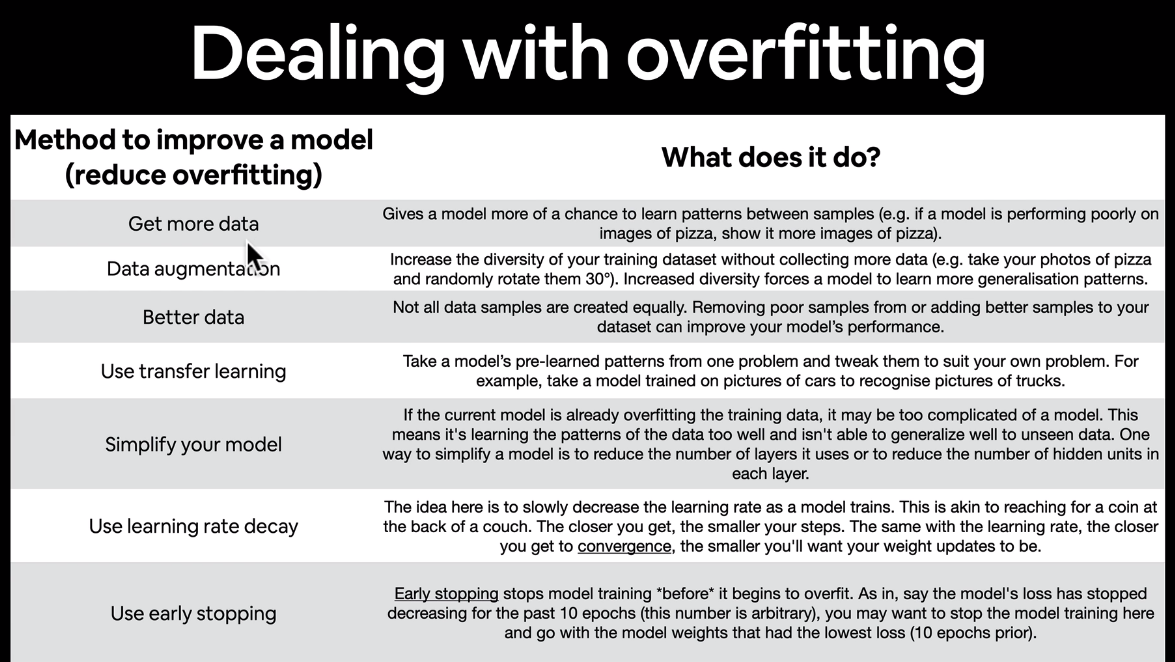

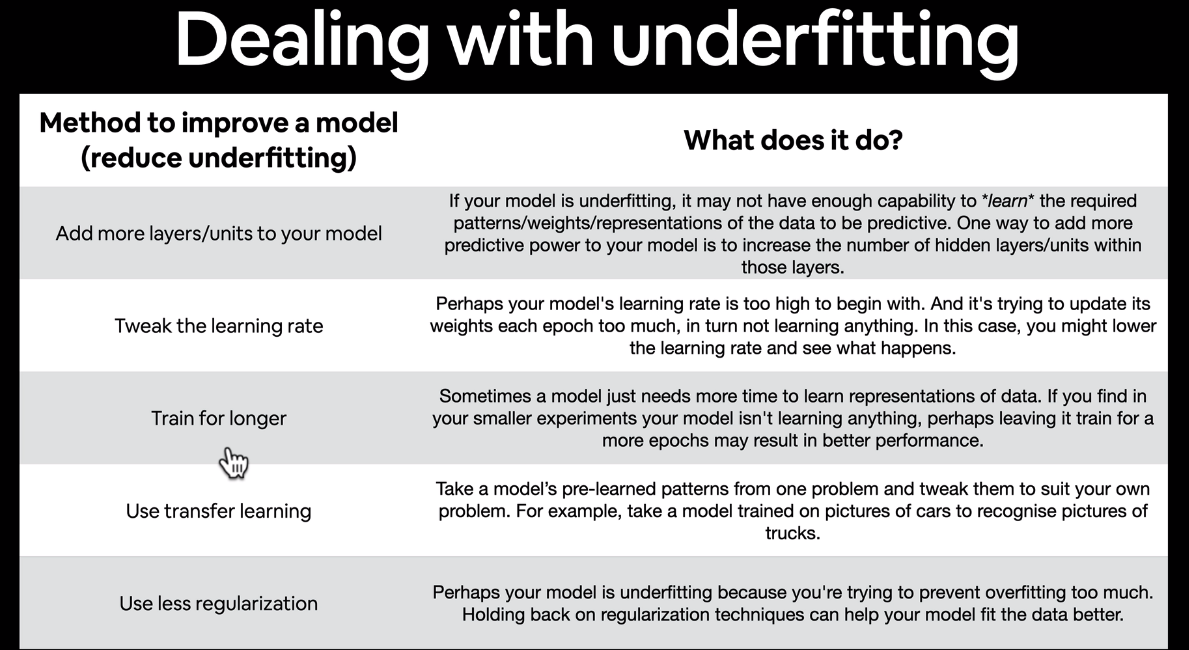

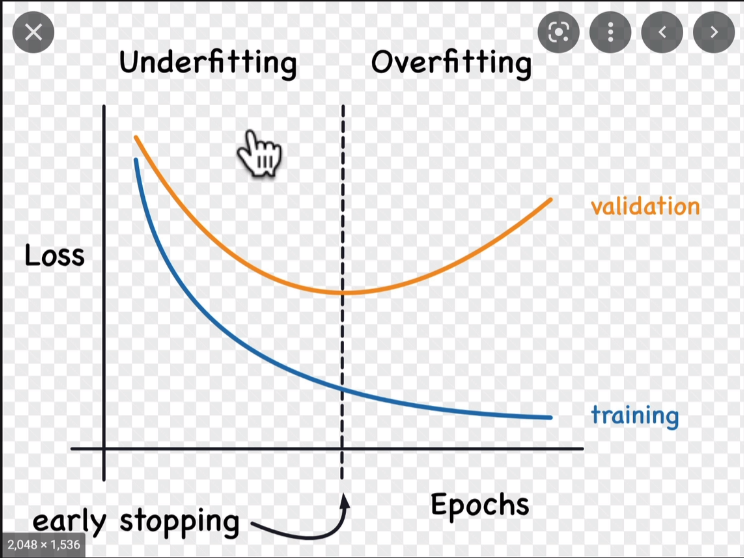

#### One way we are going to try now is data augmentation for underfitting -

#### tinyVGG with Data Augmentation - 

In [219]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [220]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [221]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f76286d5220>,
 <torch.utils.data.dataloader.DataLoader at 0x7f75e67a9cd0>)

In [222]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [224]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0755 | train_acc: 0.4961 | test_loss: 1.0515 | test_acc: 0.5508
Epoch: 2 | train_loss: 1.0292 | train_acc: 0.5508 | test_loss: 1.0054 | test_acc: 0.5039
Epoch: 3 | train_loss: 1.0938 | train_acc: 0.3555 | test_loss: 1.0759 | test_acc: 0.3984
Epoch: 4 | train_loss: 0.9801 | train_acc: 0.5703 | test_loss: 1.0109 | test_acc: 0.4414
Epoch: 5 | train_loss: 0.9959 | train_acc: 0.4766 | test_loss: 0.8979 | test_acc: 0.6055
Epoch: 6 | train_loss: 1.1288 | train_acc: 0.4492 | test_loss: 1.0000 | test_acc: 0.4414
Epoch: 7 | train_loss: 0.9699 | train_acc: 0.4688 | test_loss: 0.9411 | test_acc: 0.5508
Epoch: 8 | train_loss: 0.9669 | train_acc: 0.4648 | test_loss: 0.9428 | test_acc: 0.6055
Epoch: 9 | train_loss: 0.9663 | train_acc: 0.4648 | test_loss: 1.0737 | test_acc: 0.4297
Epoch: 10 | train_loss: 0.9594 | train_acc: 0.4766 | test_loss: 0.8873 | test_acc: 0.6211
Total training time: 12.662 seconds


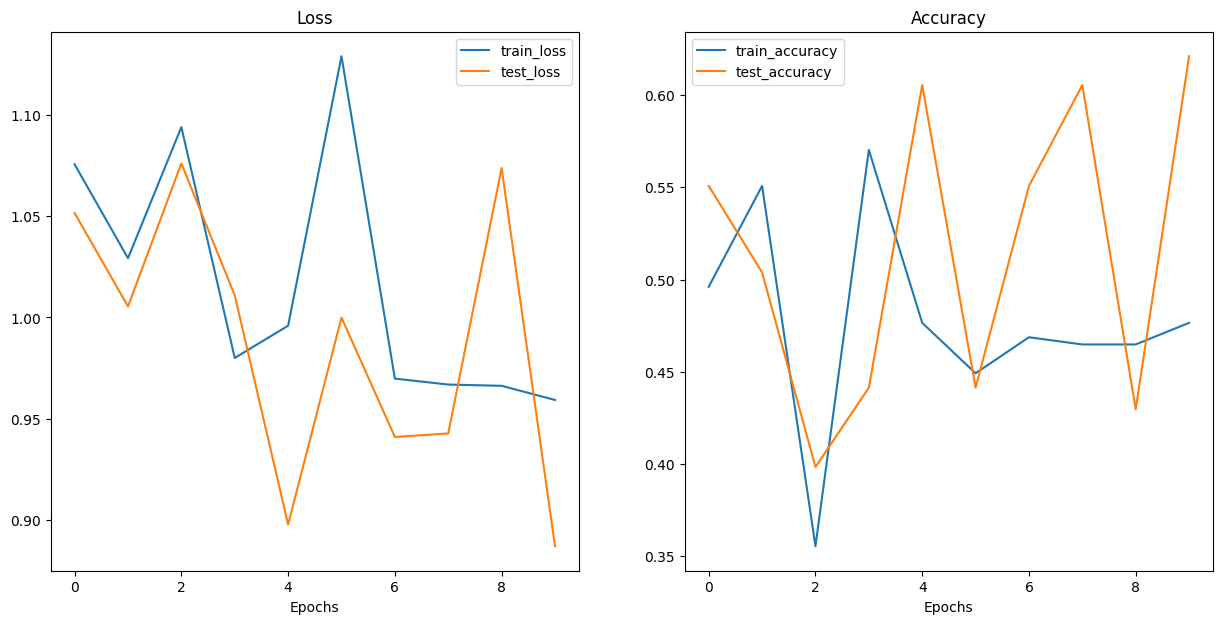

In [225]:
plot_loss_curves(model_1_results)

Compare results

In [226]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  test_loss  train_acc  test_acc
0    1.106284   1.095801   0.308594  0.582031
1    1.083412   1.079695   0.441406  0.402344
2    1.106244   1.067425   0.281250  0.406250
3    1.075418   1.055062   0.480469  0.519531
4    1.064681   1.040995   0.398438  0.394531
5    1.003552   1.008236   0.570312  0.457031
6    0.903854   0.863144   0.574219  0.562500
7    0.960859   0.928702   0.460938  0.476562
8    0.904555   0.928308   0.500000  0.519531
9    0.820088   0.823165   0.617188  0.621094

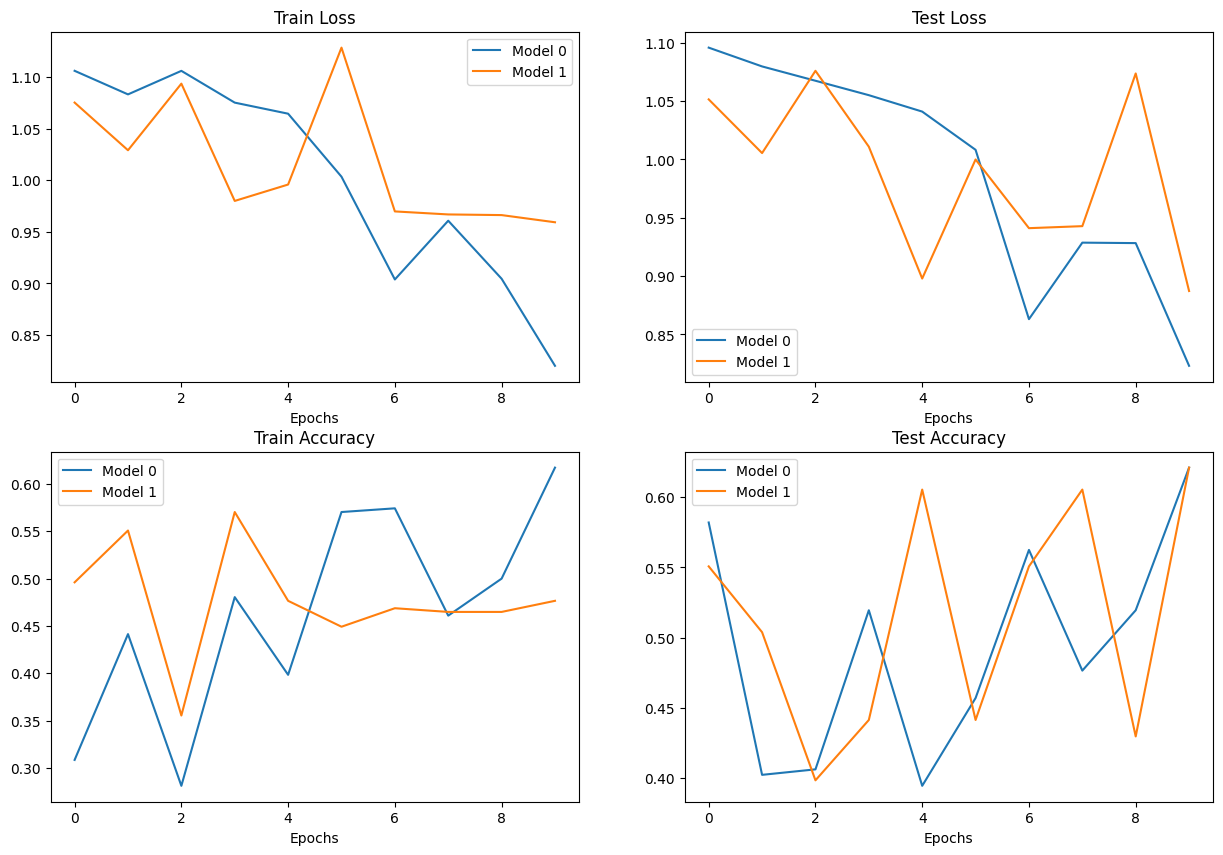

In [227]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

#### Making Prediction on custom image

In [228]:
# Download custom image

# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [231]:
custom_image_path

PosixPath('data/04-pizza-dad.jpeg')

In [235]:
import torchvision

custom_uint8_img = torchvision.io.read_image(str(custom_image_path))
custom_uint8_img.shape

torch.Size([3, 4032, 3024])

(-0.5, 3023.5, 4031.5, -0.5)

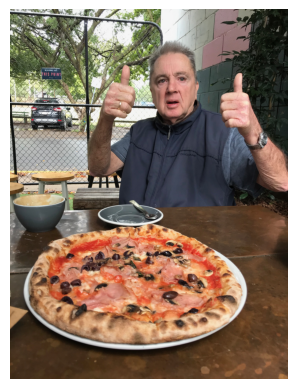

In [237]:
plt.imshow(custom_uint8_img.permute(1,2,0))
plt.axis("off")

In [238]:
custom_uint8_img.shape, custom_uint8_img.dtype, custom_uint8_img.device

(torch.Size([3, 4032, 3024]), torch.uint8, device(type='cpu'))

- Convert image to tensors and pass it thorugh the inference model
- make sure its in sam format as your previous trained data
- torch.float32 tensor
- shape 64 x 64 x 3
- on the right device
- we can read image using torchvision

In [241]:
model_1.eval()

with torch.inference_mode():
    model_1(custom_uint8_img.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [243]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
# print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dtype: torch.float32


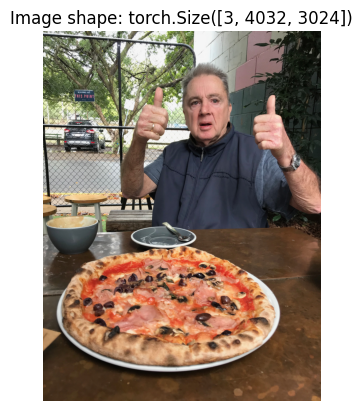

In [244]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False)

In [259]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


/home/ravina/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [260]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

In [270]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [271]:
custom_image_pred

tensor([[-0.3249, -0.3194, -0.3367]], device='cuda:0')

In [273]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(custom_image_pred_probs)
# tensor([[0.3340, 0.3359, 0.3301]], device='cuda:0')
# the probabilities are spread out, we need to assign label to it

custom_image_pred_lable = torch.argmax(custom_image_pred_probs, dim=1).cpu()
print(custom_image_pred_lable)
# tensor([1], device='cuda:0')

custom_image_pred_class = train_data.classes[custom_image_pred_lable]
print(custom_image_pred_class)

tensor([[0.3340, 0.3359, 0.3301]], device='cuda:0')
tensor([1])
steak


In [274]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

/home/ravina/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


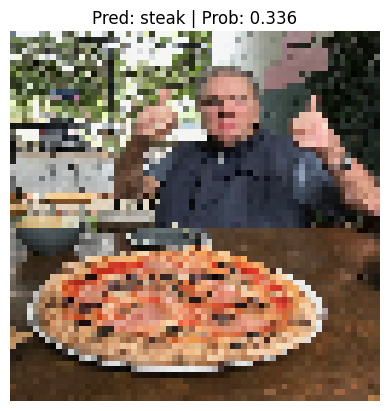

In [276]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=train_data.classes,
                    transform=custom_image_transform,
                    device=device)

WRONG PREDICTION

/home/ravina/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


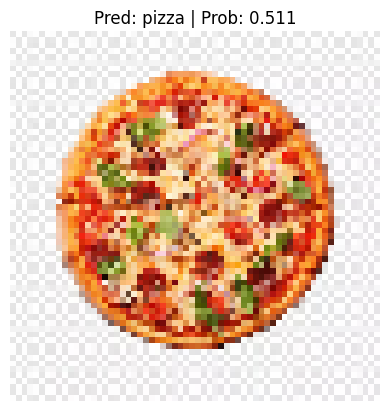

In [278]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    # image_path="/home/ravina/Desktop/PyTorch_ComputerVision/data/image.png",
                    image_path="/home/ravina/Desktop/PyTorch_ComputerVision/data/image copy.png",
                    class_names=train_data.classes,
                    transform=custom_image_transform,
                    device=device)